## Project 3: Investigate a Dataset
# A review on some features of the most profitable movies from 1960 to 2015 according to The Movie Data Base (TMDB)
Chandía, P. 

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The following report shows the results of the analysis from the "Movies database" available in The Movie Data Base (TMDB) website. The selection of cases (n= 2775) was made out of the films that had valid information on budget and revenues to calculate the profit (millions of US dollars) as a percentage of budget (return on investment) in an adjusted way according to inflation in 2015.
> As independent variables, 3 characteristics were considered: popularity, genre and rating. Popularity is defined as a metric build from a previously defined set of considerations by TMDB site, genre is a variable that allows to include up to 5 possible genres in which the film is framed and rating is the mean of the votes made by users on each film on a scale from 1 to 10 (worst to best). 

### Some guiding questions
> In the film industry there are films that are a great commercial success and their incomes are extremely high and are considered great business, however, the point of interest of this analysis is focused on considering how much was invested in the production of the movie in order to discover what factors influence in obtaining a greater benefit of that ammount.
Thus, the guiding questions are:
> 1. What about the popularity levels impact in return of investment of a movie?
> 2. What about the rating levels impact on return of investment of a movie?
> 3. What about the genres impact in return of investment of a movie?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns=None

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Read the data from csv file
movies_df = pd.read_csv("tmdb-movies.csv")
# Visualize the first 3 rows
movies_df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06-9-2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,05-13-2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,03-18-2015,2480,6.3,2015,101199955.5,2.716190e+08


In [3]:
# Get information of dataset
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# Get the number of rows and columns
movies_df.shape

(10866, 21)

In [5]:
# Summarize of NaN values
movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
# Descriptive statistics
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# Looking for duplicates
movies_df.duplicated().sum()

1

> The database contains 10866 cases and 21 columns. There are 11 variables type object, 6 type int64 and 4 type float64.

### Data Cleaning Process

In [8]:
# Drop duplicates
print("Duplicated cases before .drop:", movies_df.duplicated().sum())

movies_df = movies_df.drop_duplicates()
# Verifying 
print("Duplicated cases after .drop:", movies_df.duplicated().sum())

movies_df.size
print("Shape of dataframe:", movies_df.shape)

Duplicated cases before .drop: 1
Duplicated cases after .drop: 0
Shape of dataframe: (10865, 21)


In [9]:
# Drop out the columns that will be not used
movies_df = movies_df.drop(['id', 'budget', 'revenue', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime',
               'production_companies', 'release_date', 'vote_count'], axis=1)
movies_df.head(3)

,popularity,original_title,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,6.5,2015,137999939.3,1.392446e+09
1,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,7.1,2015,137999939.3,3.481613e+08
2,13.112507,Insurgent,Adventure|Science Fiction|Thriller,6.3,2015,101199955.5,2.716190e+08


> In order to create a new variable for return of investment ("roi"), we need information about budget and revenues higher than zero.

In [10]:
# Seleccionando solos los casos en que ambas variables son distintas de zero
movies_df = movies_df[movies_df["budget_adj"] > 0]

movies_df = movies_df[movies_df["revenue_adj"] > 0]

display(movies_df.head(3))

print("Nuevo tamaño de la base:", (movies_df.shape))

,popularity,original_title,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,6.5,2015,137999939.3,1.392446e+09
1,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,7.1,2015,137999939.3,3.481613e+08
2,13.112507,Insurgent,Adventure|Science Fiction|Thriller,6.3,2015,101199955.5,2.716190e+08


Nuevo tamaño de la base: (3854, 7)


> The dataset has 3854 valid data, and there are no NaN values into the variables of interest.

In [11]:
# Checking for non-null
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      3854 non-null   float64
 1   original_title  3854 non-null   object 
 2   genres          3854 non-null   object 
 3   vote_average    3854 non-null   float64
 4   release_year    3854 non-null   int64  
 5   budget_adj      3854 non-null   float64
 6   revenue_adj     3854 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 240.9+ KB


> The new variable roi (return of investment) is defined as the net revenues in percentage over the budget of the film.

In [12]:
# Create a new variable called roi (return of investment)
movies_df["roi"] = round(((movies_df["revenue_adj"] - movies_df["budget_adj"])/movies_df["budget_adj"]*100), 2)
# Checking
movies_df.head(3)

,popularity,original_title,genres,vote_average,release_year,budget_adj,revenue_adj,roi
0,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,6.5,2015,137999939.3,1.392446e+09,909.02
1,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,7.1,2015,137999939.3,3.481613e+08,152.29
2,13.112507,Insurgent,Adventure|Science Fiction|Thriller,6.3,2015,101199955.5,2.716190e+08,168.40


> The variable called genres needs to be separated by | in order to select the different genres. It must be considered as no order than alphabetic so all the values from gen1 to gen5 are valid.

In [13]:
# Intento de separar los objetos de las listas:
genres = movies_df["genres"].str.split('|', expand=True)
genres.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [14]:
# Changing the name of the new columns
genres.rename(columns={0:'gen1', 1: 'gen2', 2: 'gen3', 3: 'gen4', 4: 'gen5'}, inplace=True)

In [15]:
# Saving the data frame genres
genres.to_csv("generos.csv", index=False)

In [16]:
# Join both data frames
movies_df = movies_df.join(genres)

In [17]:
# Checking
movies_df.head(3)

,popularity,original_title,genres,vote_average,release_year,budget_adj,revenue_adj,roi,gen1,gen2,gen3,gen4,gen5
0,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,6.5,2015,137999939.3,1.392446e+09,909.02,Action,Adventure,Science Fiction,Thriller,None
1,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,7.1,2015,137999939.3,3.481613e+08,152.29,Action,Adventure,Science Fiction,Thriller,None
2,13.112507,Insurgent,Adventure|Science Fiction|Thriller,6.3,2015,101199955.5,2.716190e+08,168.40,Adventure,Science Fiction,Thriller,None,None


In [18]:
#Now genres column could be deleted
movies_df = movies_df.drop(['genres'], axis=1)
movies_df.head(3)


,popularity,original_title,vote_average,release_year,budget_adj,revenue_adj,roi,gen1,gen2,gen3,gen4,gen5
0,32.985763,Jurassic World,6.5,2015,137999939.3,1.392446e+09,909.02,Action,Adventure,Science Fiction,Thriller,None
1,28.419936,Mad Max: Fury Road,7.1,2015,137999939.3,3.481613e+08,152.29,Action,Adventure,Science Fiction,Thriller,None
2,13.112507,Insurgent,6.3,2015,101199955.5,2.716190e+08,168.40,Adventure,Science Fiction,Thriller,None,None


In [19]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      3854 non-null   float64
 1   original_title  3854 non-null   object 
 2   vote_average    3854 non-null   float64
 3   release_year    3854 non-null   int64  
 4   budget_adj      3854 non-null   float64
 5   revenue_adj     3854 non-null   float64
 6   roi             3854 non-null   float64
 7   gen1            3854 non-null   object 
 8   gen2            3205 non-null   object 
 9   gen3            2112 non-null   object 
 10  gen4            873 non-null    object 
 11  gen5            259 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 551.4+ KB


> The new shape of the data frame is 3854 rows and 13 columns.

In [20]:
# Función para la recodificación por décadas
def ryear_ord(row):
    if (1960 <= row < 1970):
        return "1960s"
    if (1970 <= row < 1980):
        return "1970s"
    if (1980 <= row < 1990):
        return "1980s"
    if (1990 <= row < 2000):
        return "1990s"
    if (2000 <= row < 2010):
        return "2000s"
    else:       
        return "2010s"
    
movies_df["ryear_ord"] = movies_df["release_year"].apply(ryear_ord)

display(movies_df.head(3))

,popularity,original_title,vote_average,release_year,budget_adj,revenue_adj,roi,gen1,gen2,gen3,gen4,gen5,ryear_ord
0,32.985763,Jurassic World,6.5,2015,137999939.3,1.392446e+09,909.02,Action,Adventure,Science Fiction,Thriller,None,2010s
1,28.419936,Mad Max: Fury Road,7.1,2015,137999939.3,3.481613e+08,152.29,Action,Adventure,Science Fiction,Thriller,None,2010s
2,13.112507,Insurgent,6.3,2015,101199955.5,2.716190e+08,168.40,Adventure,Science Fiction,Thriller,None,None,2010s


In [21]:
# Saving the changes in a new csv file
movies_df.to_csv("movies_df.csv", index=False)

### Getting ride out of outliers:

count    3.851000e+03
mean     1.052374e+03
std      2.638075e+04
min     -1.000000e+02
25%     -1.241000e+01
50%      1.116800e+02
75%      3.207750e+02
max      1.288939e+06
Name: roi, dtype: float64

Text(0, 0.5, 'US dollars')

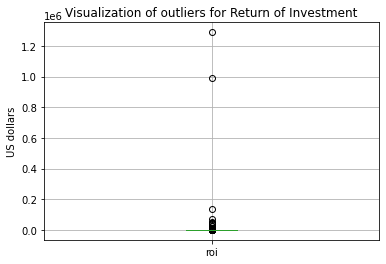

In [45]:
# Box plot visualization for "roi"
display(movies_df.describe()["roi"])
boxplot = movies_df.boxplot(column=["roi"])
plt.title("Visualization of outliers for Return of Investment")
plt.ylabel("US dollars")


count    3851.000000
mean        1.192127
std         1.475576
min         0.001117
25%         0.462448
50%         0.798104
75%         1.371352
max        32.985763
Name: popularity, dtype: float64

Text(0, 0.5, 'Rate')

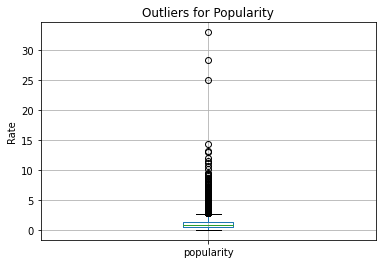

In [44]:
# Box plot visualization for "popularity"
display(movies_df.describe()["popularity"])
boxplot = movies_df.boxplot(column=["popularity"])
plt.title("Outliers for Popularity")
plt.ylabel("Rate")


count    3851.000000
mean        6.168528
std         0.795054
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

Text(0, 0.5, 'Rate')

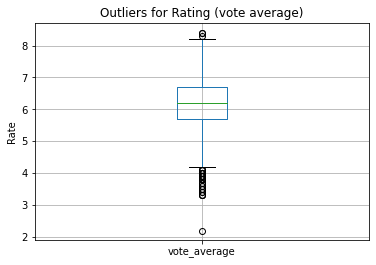

In [43]:
# Box plot visualization for "vote_average"
display(movies_df.describe()["vote_average"])
boxplot = movies_df.boxplot(column=["vote_average"])
plt.title("Outliers for Rating (vote average)")
plt.ylabel("Rate")


In [25]:
# Looking for outliers values and index of the "roi" variable
what_index = movies_df.query('roi > 1288938.670').index.tolist()
print(what_index)

[3608, 6179, 10495]


In [26]:
# Checking
movies_df = movies_df.drop(what_index, axis=0)
movies_df

,popularity,original_title,vote_average,release_year,budget_adj,revenue_adj,roi,gen1,gen2,gen3,gen4,gen5,ryear_ord
0,32.985763,Jurassic World,6.5,2015,1.379999e+08,1.392446e+09,909.02,Action,Adventure,Science Fiction,Thriller,None,2010s
1,28.419936,Mad Max: Fury Road,7.1,2015,1.379999e+08,3.481613e+08,152.29,Action,Adventure,Science Fiction,Thriller,None,2010s
2,13.112507,Insurgent,6.3,2015,1.012000e+08,2.716190e+08,168.40,Adventure,Science Fiction,Thriller,None,None,2010s
3,11.173104,Star Wars: The Force Awakens,7.5,2015,1.839999e+08,1.902723e+09,934.09,Action,Adventure,Science Fiction,Fantasy,None,2010s
4,9.335014,Furious 7,7.3,2015,1.747999e+08,1.385749e+09,692.76,Action,Crime,Thriller,None,None,2010s
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,0.670274,Who's Afraid of Virginia Woolf?,7.5,1966,5.038511e+07,2.266436e+08,349.82,Drama,None,None,None,None,1960s
10828,0.402730,Torn Curtain,6.3,1966,2.015404e+07,8.733419e+07,333.33,Mystery,Thriller,None,None,None,1960s
10829,0.395668,El Dorado,6.9,1966,3.125892e+07,4.030809e+07,28.95,Action,Western,None,None,None,1960s
10835,0.299911,The Sand Pebbles,7.0,1966,8.061618e+07,1.343603e+08,66.67,Action,Adventure,Drama,War,Romance,1960s


In [27]:
# Shape of the final dataframe
movies_df.shape

(3851, 13)

### Looking at the distribution of the variables:

,popularity,vote_average,release_year,budget_adj,revenue_adj,roi
count,3851.000000,3851.000000,3851.000000,3.851000e+03,3.851000e+03,3.851000e+03
mean,1.192127,6.168528,2001.266684,4.427446e+07,1.371078e+08,1.052374e+03
std,1.475576,0.795054,11.280153,4.480968e+07,2.161704e+08,2.638075e+04
min,0.001117,2.200000,1960.000000,9.693980e-01,2.370705e+00,-1.000000e+02
25%,0.462448,5.700000,1995.000000,1.311320e+07,1.840705e+07,-1.241000e+01
50%,0.798104,6.200000,2004.000000,3.004017e+07,6.174274e+07,1.116800e+02
75%,1.371352,6.700000,2010.000000,6.069013e+07,1.632401e+08,3.207750e+02
max,32.985763,8.400000,2015.000000,4.250000e+08,2.827124e+09,1.288939e+06


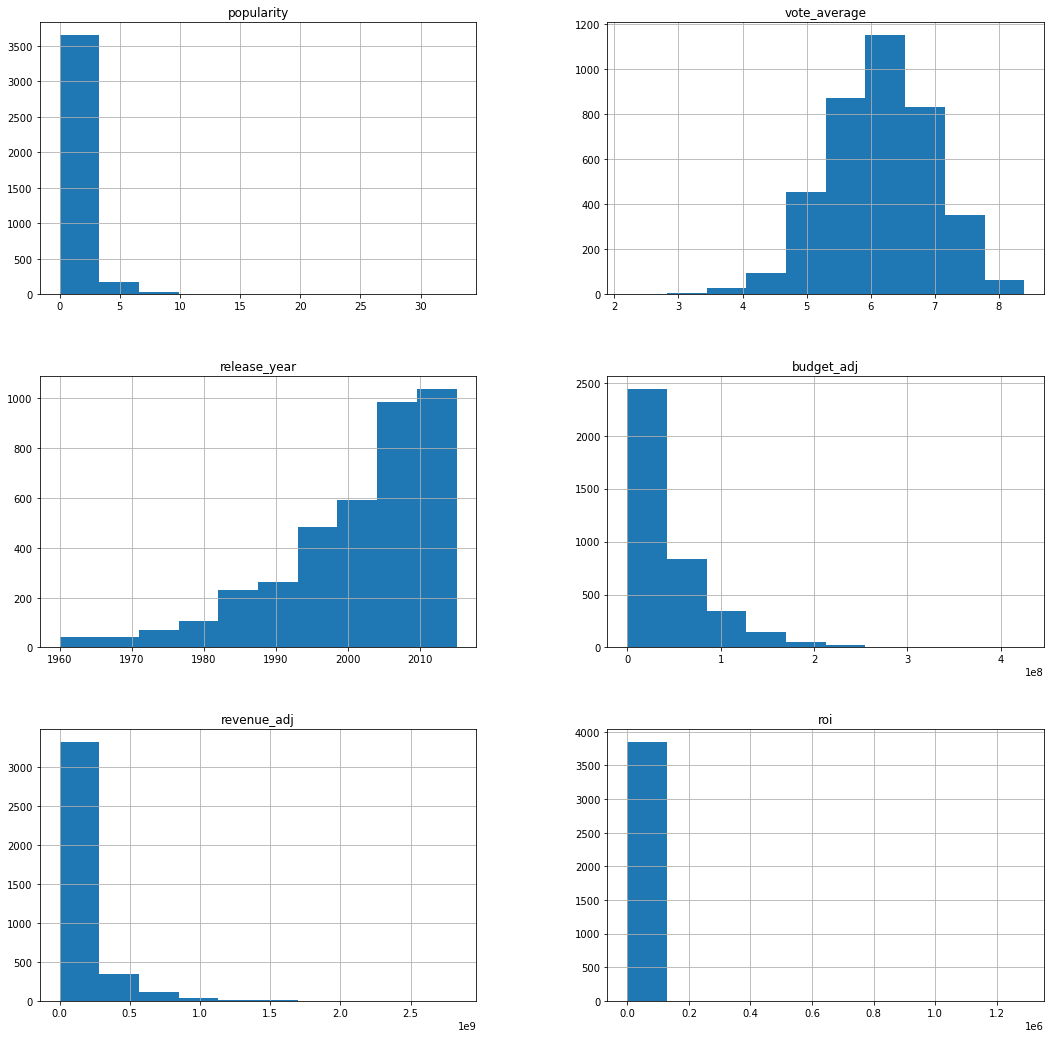

In [28]:
# Visualizing histograms for all dataset (table and graphics)
display(movies_df.describe())
movies_df.hist(figsize=(18, 18));

### Obervations:
> - Popularity is super concentrated by the right.
> - Vote_average has a normal distibution.
> - release_year seems to correlate with the amount of productions over the years.
> - budget and revenue are super concentrated to the right.
> - Return of investment is very super concentrated to the right. 

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What about the popularity levels impact in return of investment of a movie?

Text(0, 0.5, 'Return of investment')

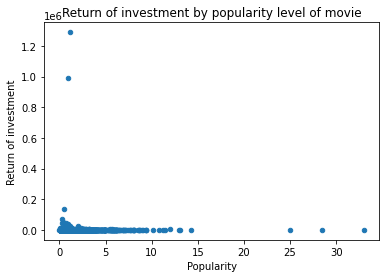

In [29]:
# Plotting popularity vs roi
movies_df.plot(x="popularity", y="roi", kind="scatter")
plt.title("Return of investment by popularity level of movie")
plt.xlabel("Popularity")
plt.ylabel("Return of investment")

The popularity levels are not necessary related to the return of investment of the movie. 
We can observe that some very low roi has high popularity.

### Research Question 2:  What about the rating levels impact in return of investment of a movie?

Text(0, 0.5, 'Return of investment')

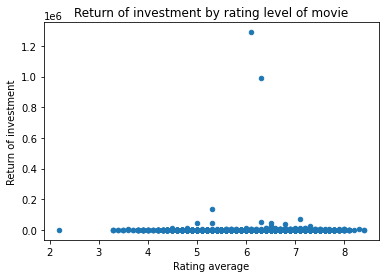

In [30]:
# Plotting vote_average vs roi
movies_df.plot(x="vote_average", y="roi", kind="scatter")
plt.title("Return of investment by rating level of movie")
plt.xlabel("Rating average")
plt.ylabel("Return of investment")

The distribution of vote_average is pretty normal and it is expressed here. The high rating doesn't implies a high return of investment.

### Research Question 3:  What about the genres impact in return of investment of a movie?

We are going to consider the 3 principal genres (most common).

In [31]:
a = movies_df.gen1.value_counts()
b = movies_df.gen2.value_counts()
c = movies_df.gen3.value_counts()
d = movies_df.gen4.value_counts()
e = movies_df.gen5.value_counts()
resumen = pd.DataFrame({'a':a, 'b':b, 'c':c, 'd':d, 'e':e})
resumen

,a,b,c,d,e
Action,689.0,267.0,103.0,19.0,6.0
Adventure,313.0,294.0,103.0,30.0,8.0
Animation,103.0,66.0,25.0,5.0,2.0
Comedy,785.0,366.0,151.0,45.0,9.0
Crime,171.0,223.0,169.0,77.0,11.0
Documentary,32.0,2.0,1.0,NaN,NaN
Drama,890.0,580.0,233.0,39.0,11.0
Family,40.0,138.0,144.0,80.0,22.0
Fantasy,110.0,134.0,84.0,50.0,18.0
Foreign,NaN,6.0,3.0,4.0,NaN


The most common genres are: Drama (1169), Comedy (1008) y Thriller (802)

In [32]:
comedy = (movies_df.query("gen1 == 'Comedy' or gen2 == 'Comedy' or gen3 == 'Comedy' or gen4 == 'Comedy' or gen5 == 'Comedy'"))
display(comedy.shape)
drama = (movies_df.query("gen1 == 'Drama' or gen2 == 'Drama' or gen3 == 'Drama' or gen4 == 'Drama' or gen5 == 'Drama'"))
display(drama.shape)
thriller = (movies_df.query("gen1 == 'Thriller' or gen2 == 'Thriller' or gen3 == 'Thriller' or gen4 == 'Thriller' or gen5 == 'Thriller'"))
display(thriller.shape)

(1356, 13)

(1753, 13)

(1203, 13)

In [33]:
display(comedy.mean()["roi"])

display(drama.mean()["roi"])

display(thriller.mean()["roi"])

507.73764011799403

393.55505419281144

424.37401496259355

In this case, the means shows that the genre of the movie is associated to the return of income, means is more profitable movie. 

<a id='conclusions'></a>
## Conclusions

### Solving the initial questions
> - In this case of study I can conclude that the return of income of a movie in related to the genre of it, being more profitable Drama, Comedy and Thriller movies, than the others.
> - In other hand, popularity doesn't seem to be related because some really high popularity movies has higher revenues but higher budget too, so the return of investment is not necessarily high.
> - Finally, the vote rating is not related to the return of income of a movie maybe because it is collected after the movie is out of exhibition.

### Some limitations
> On the other hand, I faced a few limitations: the amount of initial data was reduced considerably, almost one third, due to the amount of information missing in the budget and revenues variables. This had a negative effect because the sample was reduced and it prevented me from performing an analysis that had greater robustness for inferences.
  Also, I consider that this analysis was an exploratory investigation since more documentation could have been available on the way in which the data are collected. 